## Import needed file and libraries

In [316]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [317]:
df = pd.read_excel("merc.xlsx")
df

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0
...,...,...,...,...,...,...,...
13114,2020,35999,Automatic,500,145,55.4,2.0
13115,2020,24699,Automatic,2500,145,55.4,2.0
13116,2019,30999,Automatic,11612,145,41.5,2.1
13117,2019,37990,Automatic,2426,145,45.6,2.0


## Observe the dataset

In [319]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [320]:
df.isnull().sum()

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

In [321]:
# visualize the dataset to analyz

<Figure size 700x500 with 0 Axes>

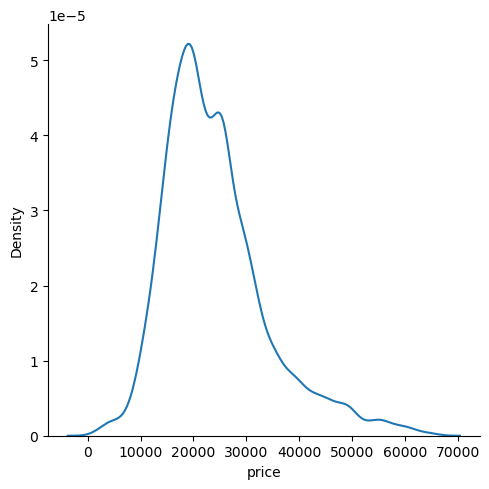

In [322]:
plt.figure(figsize=(7,5))
sbn.displot(df_encoded["price"], kind="kde")

## Encode Categorical Data to Numeric Data

In [324]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [325]:
ohe = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
transmission_ohe = ohe.fit_transform(df["transmission"].values.reshape(-1,1))
transmission_ohe.columns = [item.split("_")[1] for item in transmission_ohe.columns]
transmission_ohe

,Automatic,Manual,Other,Semi-Auto
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
13114,1.0,0.0,0.0,0.0
13115,1.0,0.0,0.0,0.0
13116,1.0,0.0,0.0,0.0
13117,1.0,0.0,0.0,0.0


In [326]:
df_encoded = pd.concat([df.iloc[:, :2], transmission_ohe], axis=1)
df_encoded = pd.concat([df_encoded, df.iloc[:, 3:]], axis=1)
df_encoded

,year,price,Automatic,Manual,Other,Semi-Auto,mileage,tax,mpg,engineSize
0,2005,5200,1.0,0.0,0.0,0.0,63000,325,32.1,1.8
1,2017,34948,1.0,0.0,0.0,0.0,27000,20,61.4,2.1
2,2016,49948,1.0,0.0,0.0,0.0,6200,555,28.0,5.5
3,2016,61948,1.0,0.0,0.0,0.0,16000,325,30.4,4.0
4,2016,73948,1.0,0.0,0.0,0.0,4000,325,30.1,4.0
...,...,...,...,...,...,...,...,...,...,...
13114,2020,35999,1.0,0.0,0.0,0.0,500,145,55.4,2.0
13115,2020,24699,1.0,0.0,0.0,0.0,2500,145,55.4,2.0
13116,2019,30999,1.0,0.0,0.0,0.0,11612,145,41.5,2.1
13117,2019,37990,1.0,0.0,0.0,0.0,2426,145,45.6,2.0


In [327]:
# observe the correlation after encoding
df_encoded.corr()["price"].sort_values()

mileage      -0.537214
mpg          -0.438445
Manual       -0.274886
Automatic    -0.018783
Other        -0.009229
Semi-Auto     0.190593
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

<Axes: xlabel='mileage', ylabel='price'>

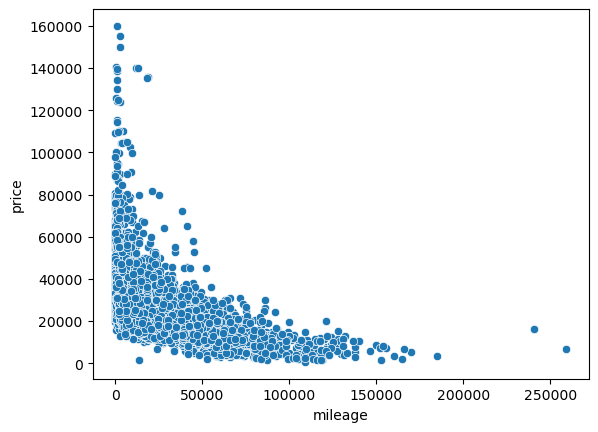

In [328]:
sbn.scatterplot(x="mileage", y="price", data=df)

## Remove some(%1 of all dataset) outlier data

In [330]:
len(df_encoded)

13119

In [331]:
remove_percentage = round(len(df_encoded) * 0.01) #piece of data will be removed

In [332]:
df_encoded = df_encoded.sort_values("price", ascending=False).iloc[remove_percentage:] #sliced after remove_percantage samples

<Figure size 700x500 with 0 Axes>

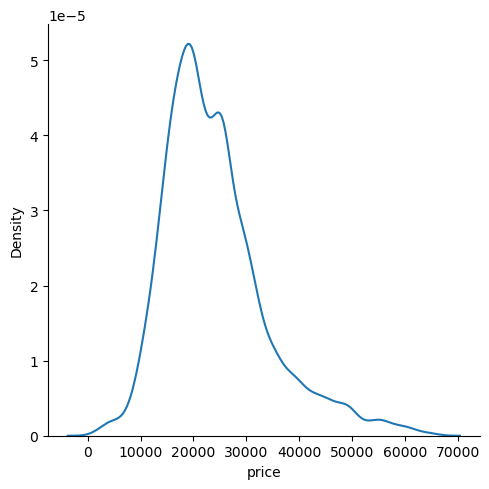

In [333]:
# visualize after removing some outliers
plt.figure(figsize=(7,5))
sbn.displot(df_encoded["price"], kind="kde")

## Train and Test Data Split

In [335]:
y = df_encoded["price"]
x = df_encoded.drop("price", axis=1)

In [336]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

In [337]:
print(f"Train:{len(x_train)}")
print(f"Test: {len(x_test)}")

Train:9091
Test: 3897


## Input Normalization

In [339]:
from sklearn.preprocessing import MinMaxScaler

In [340]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
x_train.shape

(9091, 9)

## Building The Model

In [342]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [343]:
model = Sequential()

# hidden layer
model.add(Dense(9, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(9, activation="relu"))

# output layer
model.add(Dense(1))

model.compile(optimizer = "adam", loss="mse")

## Train and Predfiction

In [345]:
model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), batch_size=128, epochs=300)

Epoch 1/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 670230016.0000 - val_loss: 686132800.0000
Epoch 2/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 662434432.0000 - val_loss: 682847168.0000
Epoch 3/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 665752768.0000 - val_loss: 640625792.0000
Epoch 4/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 587747456.0000 - val_loss: 366619456.0000
Epoch 5/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 249462384.0000 - val_loss: 91151912.0000
Epoch 6/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 94307544.0000 - val_loss: 86195616.0000
Epoch 7/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 83546416.0000 - val_loss: 82793384.0000
Epoch 8/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 81661840.0000 - val_loss: 80263808.0000
Epoch 9/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 79982360.0000 - val_loss: 76156576.0000
Epoch 10/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 78821288.0000 - val_loss: 73713016.0000


In [378]:
pred = model.predict(x_test)

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


## Evaluation

In [347]:
df_loss = pd.DataFrame(model.history.history)

In [348]:
df_loss.head()

,loss,val_loss
0,672885760.0,686132800.0
1,671862144.0,682847168.0
2,656750784.0,640625792.0
3,526490464.0,366619456.0
4,175852672.0,91151912.0


<Axes: >

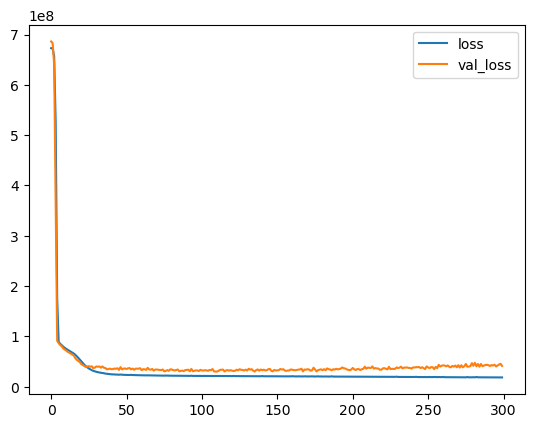

In [349]:
df_loss.plot()

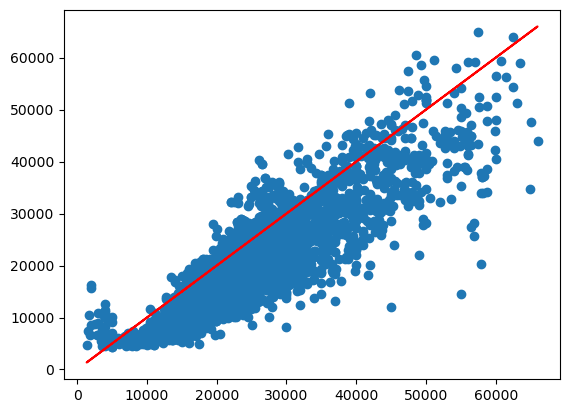

In [382]:
plt.figure()
plt.scatter(y_test, pred)
plt.plot(y_test, y_test, color="red")

In [386]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, pred)
print(f"Mean Absolute Error Value: {mae}")

Mean Absolute Error Value: 4985.547401747338


In [412]:
prediction_change_percentage = round(mae/df_encoded.describe()["price"]["mean"]*100)
print(f"It is highly probable that this model's predicted value is {prediction_change_percentage}% under or over the expected value.")

It is highly probable that this model's predicted value is 21% under or over the expected value.
